<a href="https://colab.research.google.com/github/cse97/COMPUTATIONAL-GEOMETRY-CODES-CU-2nd-sem-assignment-/blob/main/Graham_scan_algorithm_for_convex_hull_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduce N: 10


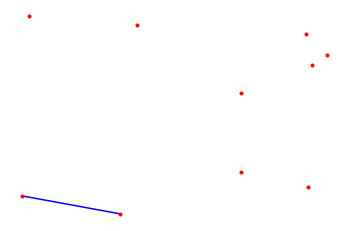

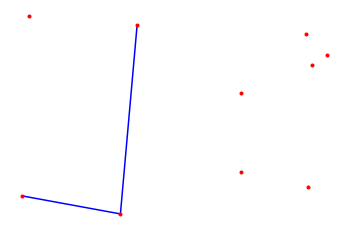

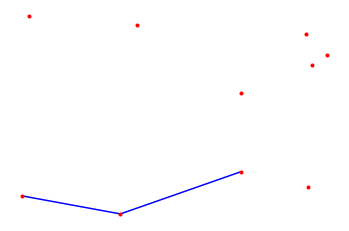

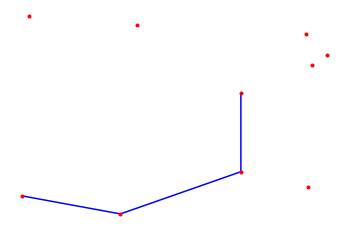

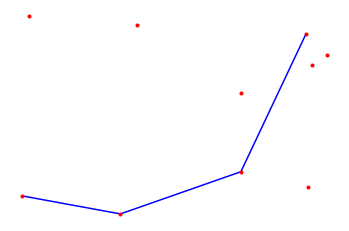

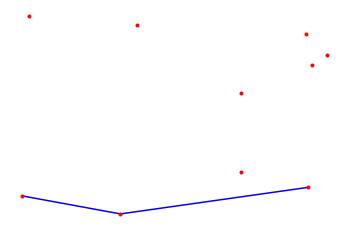

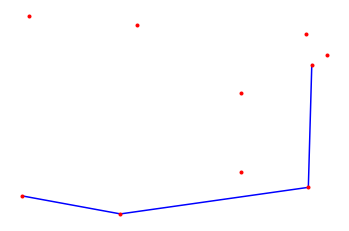

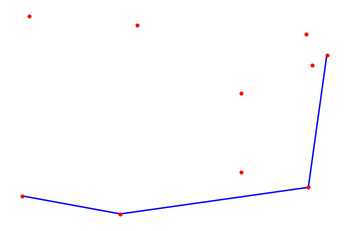

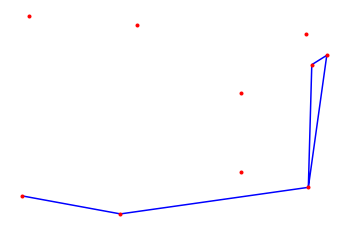

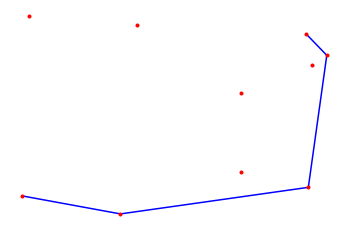

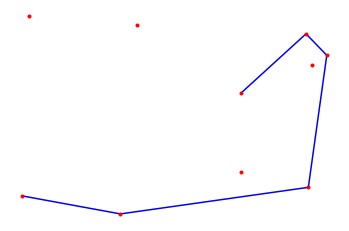

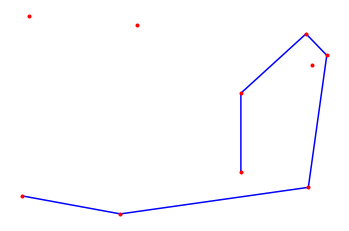

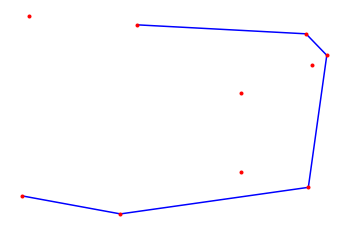

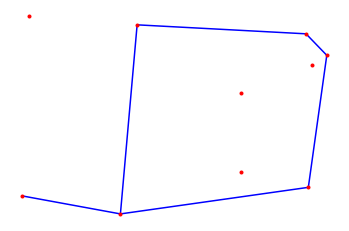

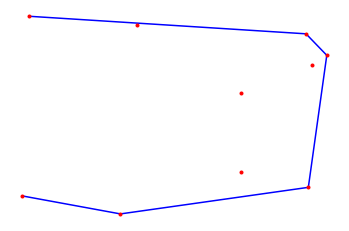

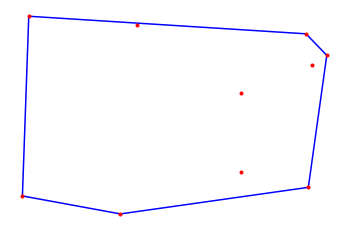

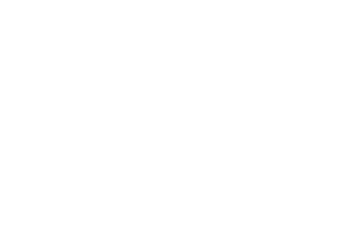

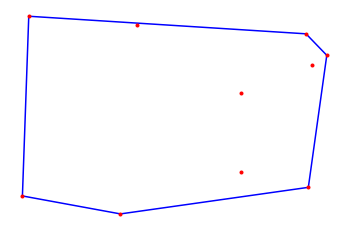

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Function to know if we have a CCW turn
def RightTurn(p1, p2, p3):
	if (p3[1]-p1[1])*(p2[0]-p1[0]) >= (p2[1]-p1[1])*(p3[0]-p1[0]):
		return False
	return True

# Main algorithm:
def GrahamScan(P):
	P.sort()			# Sort the set of points
	P = np.array(P)			# Convert the list to numpy array
	plt.figure()			# Create a new fig
	L_upper = [P[0], P[1]]		# Initialize the upper part
	# Compute the upper part of the hull
	for i in range(2,len(P)):
		L_upper.append(P[i])
		while len(L_upper) > 2 and not RightTurn(L_upper[-1],L_upper[-2],L_upper[-3]):
			del L_upper[-2]
		L = np.array(L_upper)
		plt.clf()		# Clear plt.fig
		plt.plot(L[:,0],L[:,1], 'b-', picker=5)	# Plot lines
		plt.plot(P[:,0],P[:,1],".r")		# Plot points
		plt.axis('off')		# No axis
		plt.show(block=False)	# Close plot
		plt.pause(0.0000001)	# Mini-pause before closing plot
	L_lower = [P[-1], P[-2]]	# Initialize the lower part
	# Compute the lower part of the hull
	for i in range(len(P)-3,-1,-1):
		L_lower.append(P[i])
		while len(L_lower) > 2 and not RightTurn(L_lower[-1],L_lower[-2],L_lower[-3]):
			del L_lower[-2]
		L = np.array(L_upper + L_lower)
		plt.clf()               # Clear plt.fig
		plt.plot(L[:,0],L[:,1], 'b-', picker=5)   # Plot lines
		plt.plot(P[:,0],P[:,1],".r")              # Plot points
		plt.axis('off')         # No axis
		plt.show(block=False)   # Close plot
		plt.pause(0.0000001)	# Mini-pause befor closing plot
	del L_lower[0]
	del L_lower[-1]
	L = L_upper + L_lower 		# Build the full hull
	plt.axis('off')
	plt.show()
	return np.array(L)

def main():
	try:
		N = int(sys.argv[1])
	except:
		N = int(input("Introduce N: "))
		
	# By default we build a random set of N points with coordinates in [-300,300)x[-300,300):
	P = [(np.random.randint(-300,300),np.random.randint(-300,300)) for i in range(N)]
	L = GrahamScan(P)
	P = np.array(P)
	
	# Plot the computed Convex Hull:
	plt.figure()
	plt.plot(L[:,0],L[:,1], 'b-', picker=5)
	plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'b-', picker=5)
	plt.plot(P[:,0],P[:,1],".r")
	plt.axis('off')
	plt.show()

if __name__ == '__main__':
  main()
